# Pytorch Model Performace Analysis

## Objectives:
1. Setup Our PyTorch Model and Data
2. Load the previously trained model
3. View the images we misclassified
4. Create a Confusion Matrix
5. Create Classification Report

In [23]:
# Import PyTorch
import torch

# We use torchvision to get our dataset and useful image transformations
import torchvision
import torchvision.transforms as transforms

# Import PyTorch's optimization libary and nn
# nn is used as the basic building block for our Network graphs
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

# Are we using our GPU?
print("GPU available: {}".format(torch.cuda.is_available()))

# Set device to cuda
device = 'cuda'

GPU available: True


In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imgshow(title, image = None, size = 6):
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()

## Loading MNIST dataset

In [25]:
# Transform to a PyTorch tensors and the normalize our valeus between -1 and +1
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])

# Load our Test Data and specify what transform to use when loading
testset = torchvision.datasets.MNIST('mnist', 
                                     train = False,
                                     download = True,
                                     transform = transform)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

## Creating Model Definition Class

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## Loading Model

In [27]:
# Create an instance of the model
net = Net()
net.to(device)

# Load weights from the specified path
net.load_state_dict(torch.load('./mnist_cnn_net.pth'))

<All keys matched successfully>

In [28]:
correct = 0 
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 98.1%


Actual Label: 5, Predicted Label: 6


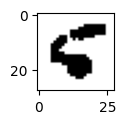

Actual Label: 9, Predicted Label: 4


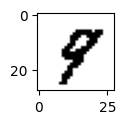

Actual Label: 4, Predicted Label: 2


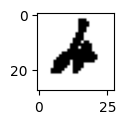

Actual Label: 6, Predicted Label: 0


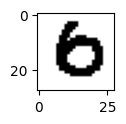

Actual Label: 2, Predicted Label: 7


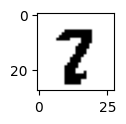

Actual Label: 5, Predicted Label: 3


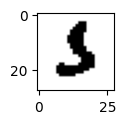

Actual Label: 6, Predicted Label: 0


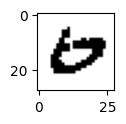

Actual Label: 3, Predicted Label: 5


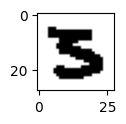

Actual Label: 8, Predicted Label: 0


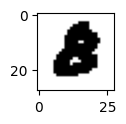

Actual Label: 8, Predicted Label: 2


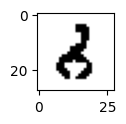

Actual Label: 2, Predicted Label: 1


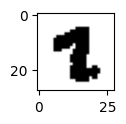

Actual Label: 7, Predicted Label: 3


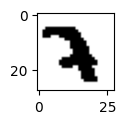

Actual Label: 0, Predicted Label: 6


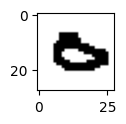

Actual Label: 9, Predicted Label: 8


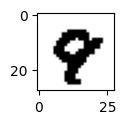

Actual Label: 8, Predicted Label: 7


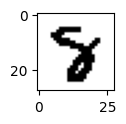

Actual Label: 9, Predicted Label: 7


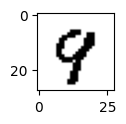

Actual Label: 8, Predicted Label: 9


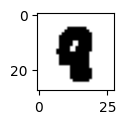

Actual Label: 6, Predicted Label: 0


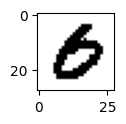

Actual Label: 6, Predicted Label: 5


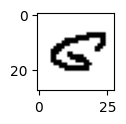

Actual Label: 5, Predicted Label: 8


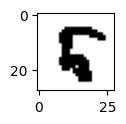

Actual Label: 7, Predicted Label: 2


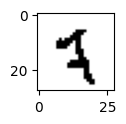

Actual Label: 4, Predicted Label: 6


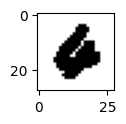

Actual Label: 6, Predicted Label: 8


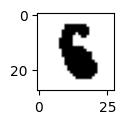

Actual Label: 7, Predicted Label: 2


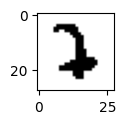

Actual Label: 9, Predicted Label: 4


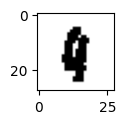

Actual Label: 4, Predicted Label: 9


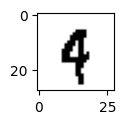

Actual Label: 9, Predicted Label: 0


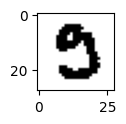

Actual Label: 7, Predicted Label: 1


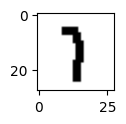

Actual Label: 5, Predicted Label: 7


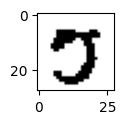

Actual Label: 8, Predicted Label: 0


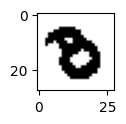

Actual Label: 7, Predicted Label: 2


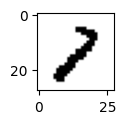

Actual Label: 2, Predicted Label: 6


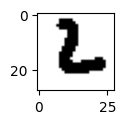

Actual Label: 5, Predicted Label: 6


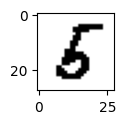

Actual Label: 5, Predicted Label: 3


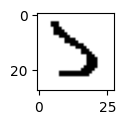

Actual Label: 9, Predicted Label: 4


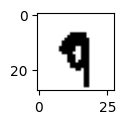

Actual Label: 7, Predicted Label: 1


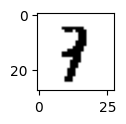

Actual Label: 7, Predicted Label: 9


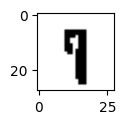

Actual Label: 1, Predicted Label: 6


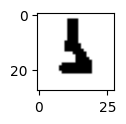

Actual Label: 8, Predicted Label: 7


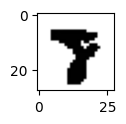

Actual Label: 4, Predicted Label: 6


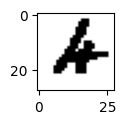

Actual Label: 9, Predicted Label: 3


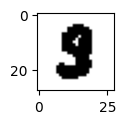

Actual Label: 0, Predicted Label: 6


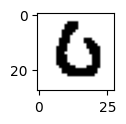

Actual Label: 2, Predicted Label: 0


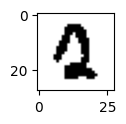

Actual Label: 3, Predicted Label: 7


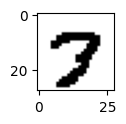

Actual Label: 9, Predicted Label: 5


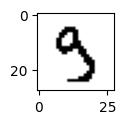

Actual Label: 8, Predicted Label: 0


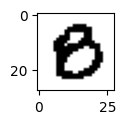

Actual Label: 7, Predicted Label: 2


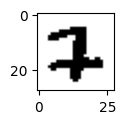

Actual Label: 2, Predicted Label: 9


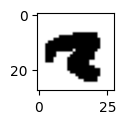

Actual Label: 9, Predicted Label: 4


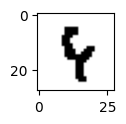

Actual Label: 5, Predicted Label: 0


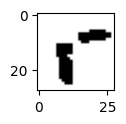

Actual Label: 2, Predicted Label: 0


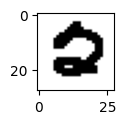

Actual Label: 7, Predicted Label: 2


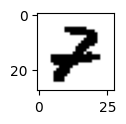

Actual Label: 5, Predicted Label: 3


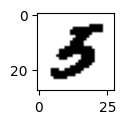

Actual Label: 5, Predicted Label: 6


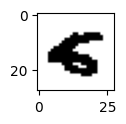

Actual Label: 4, Predicted Label: 8


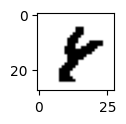

Actual Label: 4, Predicted Label: 9


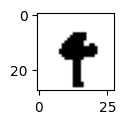

Actual Label: 2, Predicted Label: 0


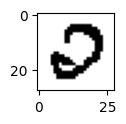

Actual Label: 3, Predicted Label: 7


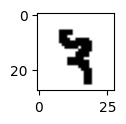

Actual Label: 6, Predicted Label: 0


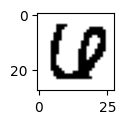

Actual Label: 9, Predicted Label: 2


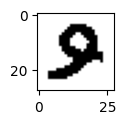

Actual Label: 4, Predicted Label: 9


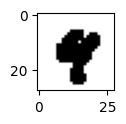

Actual Label: 6, Predicted Label: 1


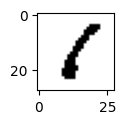

Actual Label: 1, Predicted Label: 2


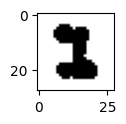

Actual Label: 9, Predicted Label: 1


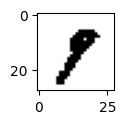

Actual Label: 1, Predicted Label: 6


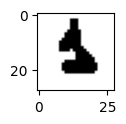

Actual Label: 8, Predicted Label: 0


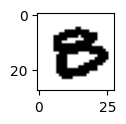

Actual Label: 9, Predicted Label: 0


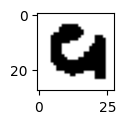

Actual Label: 5, Predicted Label: 9


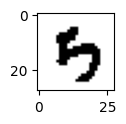

Actual Label: 9, Predicted Label: 1


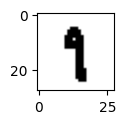

Actual Label: 9, Predicted Label: 4


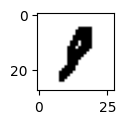

Actual Label: 9, Predicted Label: 4


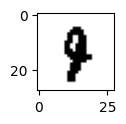

Actual Label: 2, Predicted Label: 1


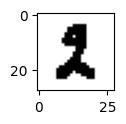

Actual Label: 6, Predicted Label: 8


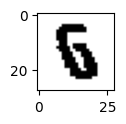

Actual Label: 2, Predicted Label: 0


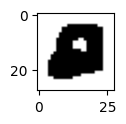

Actual Label: 2, Predicted Label: 4


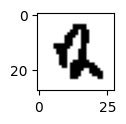

Actual Label: 7, Predicted Label: 8


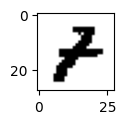

Actual Label: 9, Predicted Label: 0


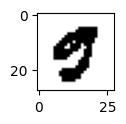

Actual Label: 6, Predicted Label: 1


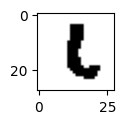

Actual Label: 9, Predicted Label: 4


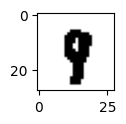

Actual Label: 9, Predicted Label: 4


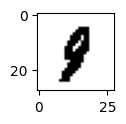

Actual Label: 8, Predicted Label: 0


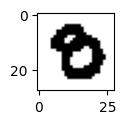

Actual Label: 3, Predicted Label: 2


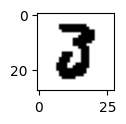

Actual Label: 3, Predicted Label: 2


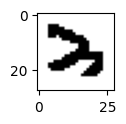

Actual Label: 9, Predicted Label: 7


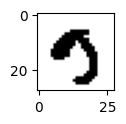

Actual Label: 3, Predicted Label: 5


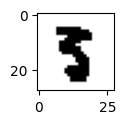

Actual Label: 6, Predicted Label: 8


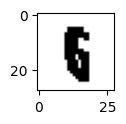

Actual Label: 9, Predicted Label: 1


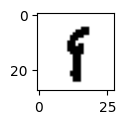

Actual Label: 9, Predicted Label: 7


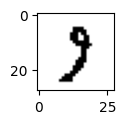

Actual Label: 1, Predicted Label: 2


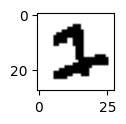

Actual Label: 8, Predicted Label: 3


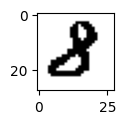

Actual Label: 8, Predicted Label: 9


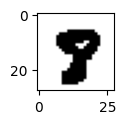

Actual Label: 6, Predicted Label: 0


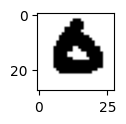

Actual Label: 9, Predicted Label: 1


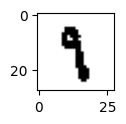

Actual Label: 6, Predicted Label: 4


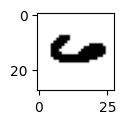

Actual Label: 6, Predicted Label: 5


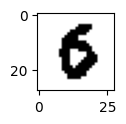

Actual Label: 5, Predicted Label: 0


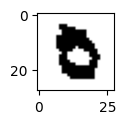

Actual Label: 9, Predicted Label: 3


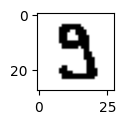

Actual Label: 8, Predicted Label: 0


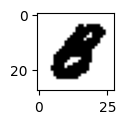

Actual Label: 4, Predicted Label: 9


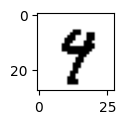

Actual Label: 7, Predicted Label: 2


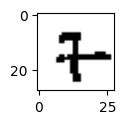

Actual Label: 8, Predicted Label: 3


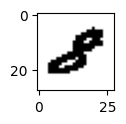

Actual Label: 7, Predicted Label: 2


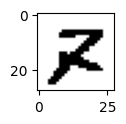

Actual Label: 4, Predicted Label: 6


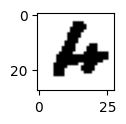

Actual Label: 7, Predicted Label: 3


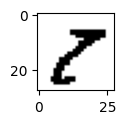

Actual Label: 7, Predicted Label: 1


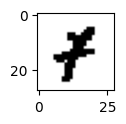

Actual Label: 9, Predicted Label: 4


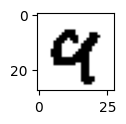

Actual Label: 5, Predicted Label: 0


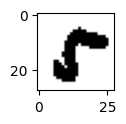

Actual Label: 9, Predicted Label: 4


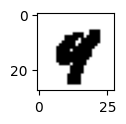

Actual Label: 5, Predicted Label: 6


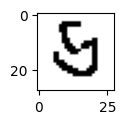

Actual Label: 1, Predicted Label: 3


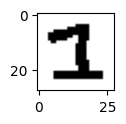

Actual Label: 4, Predicted Label: 6


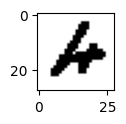

Actual Label: 7, Predicted Label: 1


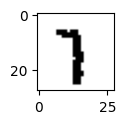

Actual Label: 0, Predicted Label: 2


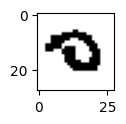

Actual Label: 8, Predicted Label: 0


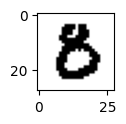

Actual Label: 9, Predicted Label: 3


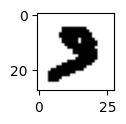

Actual Label: 9, Predicted Label: 4


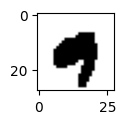

Actual Label: 5, Predicted Label: 1


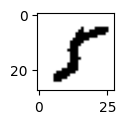

Actual Label: 9, Predicted Label: 0


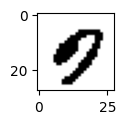

Actual Label: 2, Predicted Label: 7


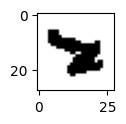

Actual Label: 9, Predicted Label: 7


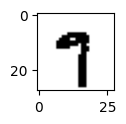

Actual Label: 7, Predicted Label: 3


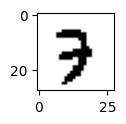

Actual Label: 2, Predicted Label: 4


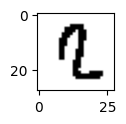

Actual Label: 3, Predicted Label: 0


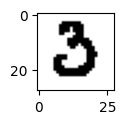

Actual Label: 2, Predicted Label: 7


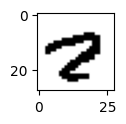

Actual Label: 9, Predicted Label: 4


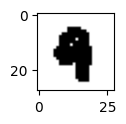

Actual Label: 9, Predicted Label: 1


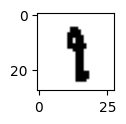

Actual Label: 6, Predicted Label: 5


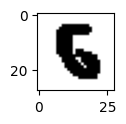

Actual Label: 5, Predicted Label: 6


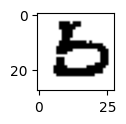

Actual Label: 7, Predicted Label: 9


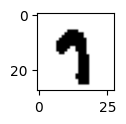

Actual Label: 8, Predicted Label: 4


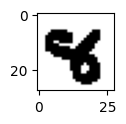

Actual Label: 2, Predicted Label: 4


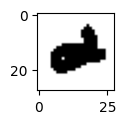

Actual Label: 8, Predicted Label: 9


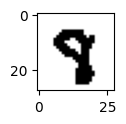

Actual Label: 8, Predicted Label: 7


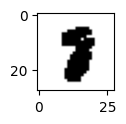

Actual Label: 3, Predicted Label: 9


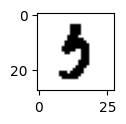

Actual Label: 9, Predicted Label: 8


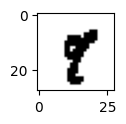

Actual Label: 8, Predicted Label: 0


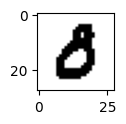

Actual Label: 6, Predicted Label: 0


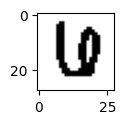

Actual Label: 9, Predicted Label: 4


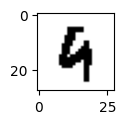

Actual Label: 0, Predicted Label: 8


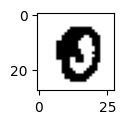

Actual Label: 8, Predicted Label: 4


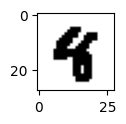

Actual Label: 3, Predicted Label: 5


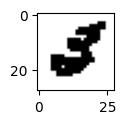

Actual Label: 1, Predicted Label: 6


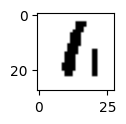

Actual Label: 7, Predicted Label: 9


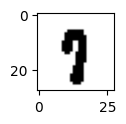

Actual Label: 1, Predicted Label: 8


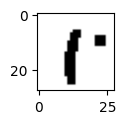

Actual Label: 3, Predicted Label: 7


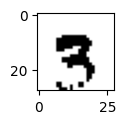

Actual Label: 7, Predicted Label: 0


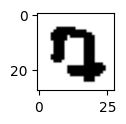

Actual Label: 4, Predicted Label: 0


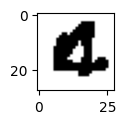

Actual Label: 5, Predicted Label: 3


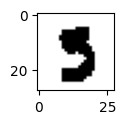

Actual Label: 3, Predicted Label: 8


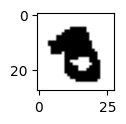

Actual Label: 3, Predicted Label: 8


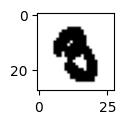

Actual Label: 2, Predicted Label: 0


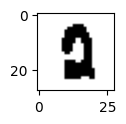

Actual Label: 3, Predicted Label: 9


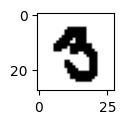

Actual Label: 3, Predicted Label: 8


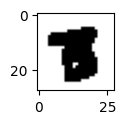

Actual Label: 9, Predicted Label: 5


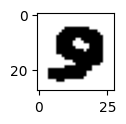

Actual Label: 9, Predicted Label: 3


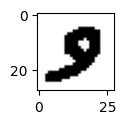

Actual Label: 9, Predicted Label: 0


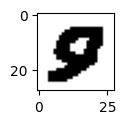

Actual Label: 9, Predicted Label: 0


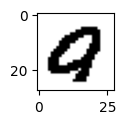

Actual Label: 9, Predicted Label: 7


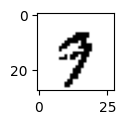

Actual Label: 0, Predicted Label: 7


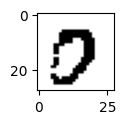

Actual Label: 8, Predicted Label: 2


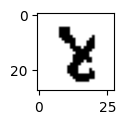

Actual Label: 0, Predicted Label: 2


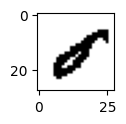

Actual Label: 8, Predicted Label: 9


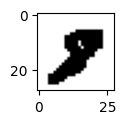

Actual Label: 1, Predicted Label: 6


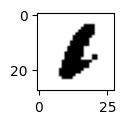

Actual Label: 8, Predicted Label: 9


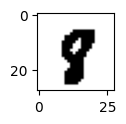

Actual Label: 4, Predicted Label: 8


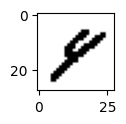

Actual Label: 2, Predicted Label: 4


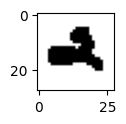

Actual Label: 1, Predicted Label: 8


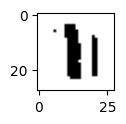

Actual Label: 2, Predicted Label: 1


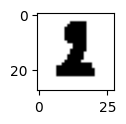

Actual Label: 2, Predicted Label: 1


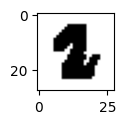

Actual Label: 2, Predicted Label: 1


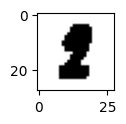

Actual Label: 6, Predicted Label: 4


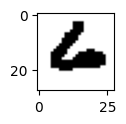

Actual Label: 8, Predicted Label: 6


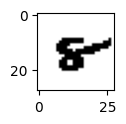

Actual Label: 8, Predicted Label: 6


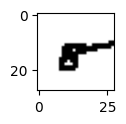

Actual Label: 8, Predicted Label: 6


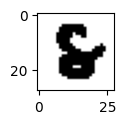

Actual Label: 7, Predicted Label: 2


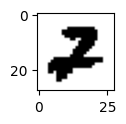

Actual Label: 7, Predicted Label: 2


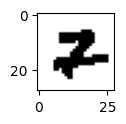

Actual Label: 7, Predicted Label: 2


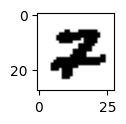

Actual Label: 7, Predicted Label: 2


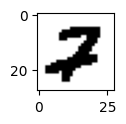

Actual Label: 9, Predicted Label: 4


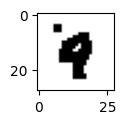

Actual Label: 0, Predicted Label: 3


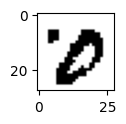

Actual Label: 9, Predicted Label: 7


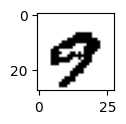

Actual Label: 2, Predicted Label: 7


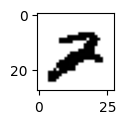

Actual Label: 5, Predicted Label: 6


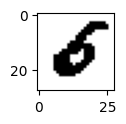

Actual Label: 5, Predicted Label: 6


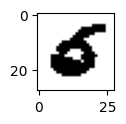

Actual Label: 2, Predicted Label: 0


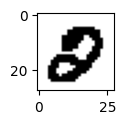

Actual Label: 5, Predicted Label: 0


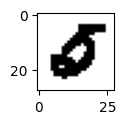

Actual Label: 2, Predicted Label: 0


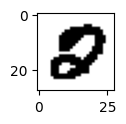

Actual Label: 2, Predicted Label: 7


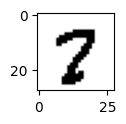

Actual Label: 3, Predicted Label: 7


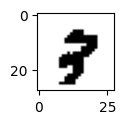

Actual Label: 5, Predicted Label: 6


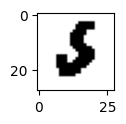

In [29]:
# Set model to evaluation or inference mode
net.eval()

# We don't need gradients for validation, so wrap in 
# no_grad to save memory
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.argmax() to get the predictions, argmax is used for long_tensors
        predictions = torch.argmax(outputs, dim=1)

        # For test data in each batch we identify when predictions did not match the labe
        # then we print out the actual ground truth 
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {label}, Predicted Label: {pred}')       
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)

## **Creating our Confusion Matrix**

We use Sklean's Confusion Matrix tool to create it. All we need is:
1. The true labels
2. The predicted labels


In [30]:
from sklearn.metrics import confusion_matrix


# Initialize blank tensors to store our predictions and labels lists(tensors)
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
        label_list = torch.cat([label_list, classes.view(-1).cpu()])

# Confusion matrix
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

[[ 973    0    2    1    0    0    2    1    1    0]
 [   0 1126    2    1    0    0    4    0    2    0]
 [   7    5 1009    0    4    0    1    5    0    1]
 [   1    0    2  995    0    3    0    4    3    2]
 [   1    0    1    0  970    0    4    0    2    4]
 [   4    1    0    4    0  872    8    1    1    1]
 [   6    2    0    0    2    3  942    0    3    0]
 [   1    4   11    3    0    0    0 1005    1    3]
 [   8    0    2    2    2    0    3    3  949    5]
 [   6    5    1    4   14    2    0    6    2  969]]


## **Interpreting Confusion Matrix**

### **Creating a more presentable plot**

We'll reuse this nicely done function from the sklearn documentation on plotting a confusion matrix using color gradients and labels.

In [31]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

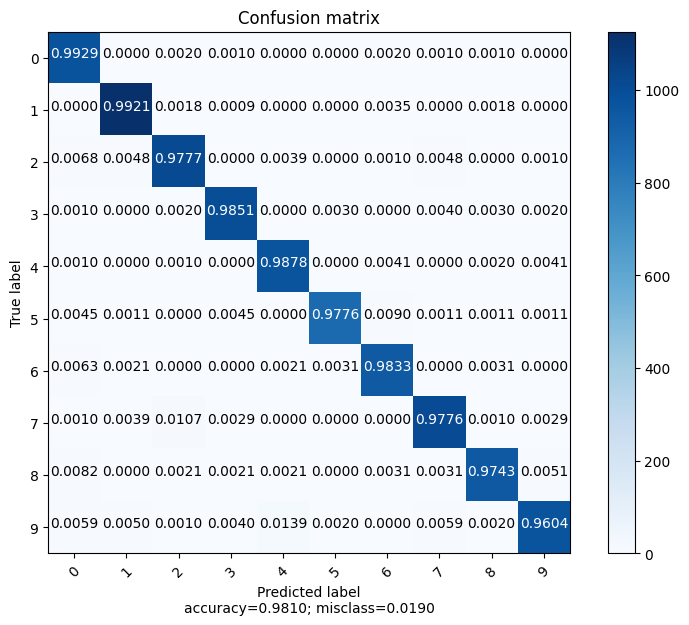

In [32]:
target_names = list(range(0,10))
plot_confusion_matrix(conf_mat, target_names)

In [33]:
# Per-class accuracy
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i,ca) in enumerate(class_accuracy):
    print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 99.286%
Accuracy for 1 : 99.207%
Accuracy for 2 : 97.771%
Accuracy for 3 : 98.515%
Accuracy for 4 : 98.778%
Accuracy for 5 : 97.758%
Accuracy for 6 : 98.330%
Accuracy for 7 : 97.763%
Accuracy for 8 : 97.433%
Accuracy for 9 : 96.036%


### **Classification Report**

In [34]:
from sklearn.metrics import classification_report

print(classification_report(label_list.numpy(), pred_list.numpy()))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## **Overall Performance:**

The model achieves a high overall accuracy (98%), indicating good generalization on the test set.
The macro and weighted average values for precision, recall, and F1-score are all around 0.98, suggesting a balanced performance across all digits (classes) in the MNIST dataset.

## **Class-wise Analysis:**

Looking at individual classes (digits), we see a consistent pattern:

**High Precision (0.95-0.99):** Most digits the model predicts as a specific class (e.g., "3") actually are that class (low False Positives).
High Recall (0.96-1.00): The model correctly identifies a large portion of the actual digits in the test set (low False Negatives) for each class.
This suggests the model is very good at not confusing digits with each other (high precision) and identifying most of the true digits present in the data (high recall).

However, the observation about high False Negatives (missing positive examples) doesn't seem entirely accurate based on the recall values. Here's a breakdown:

**Recall values** (0.96-1.00) are all relatively high, indicating the model misses very few actual digits in each class. Even the lowest recall of 0.95 for class 3 suggests it correctly identifies 95% of the true "3"s in the test set.
Possible Interpretations:

Given the high recall across classes, there could be other reasons why the model might seem to be "missing" positive examples:

**Data Imbalance:** The MNIST dataset might have some classes with slightly fewer examples compared to others. While the model performs well on average, it could be missing a slightly higher percentage of digits in those under-represented classes (even with a recall of 0.95-0.97).
Decision Threshold: The model might use a classification threshold that slightly favors precision. This could lead to a few true positives being classified as negatives, even though the model "sees" them to some degree.

**Further Analysis:**

Investigate the distribution of examples across different digits in the MNIST dataset to see if there are any class imbalances.
Analyze the confusion matrix (if available) to see which digits are most commonly confused with each other (might indicate areas for improvement).
Experiment with adjusting the classification threshold (if possible) to see if it affects the trade-off between precision and recall.

**Conclusion:**

The model performs very well overall, achieving high accuracy, precision, and recall across most digits. However, depending on your specific application, you might want to explore ways to further improve performance for specific under-represented classes or adjust the decision threshold for a better balance between precision and recall.